In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
#import suicide csv

df=pd.read_csv("../data/suicide_rate.csv")

In [3]:
#import depression csv

df1=pd.read_csv('../data/prevalence-of-depression-by-age.csv')

In [4]:
#start cleaning. age needs to be changed for final merge

df['age'].value_counts()

df['age']=df['age'].str.replace(' ','').str.replace(r'\W','')


In [5]:
#confirm

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,1524years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,3554years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,1524years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,2534years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
#change age

df['age']=(df['age'].str.replace("75years","35+ years")
                    .str.replace("2534years","25-34 years")
                    .str.replace("3554years","35+ years")
                    .str.replace("1524years","15-24 years")
                    .str.replace("5574years","35+ years")
                    .str.replace("514years","14- years"))

In [7]:
#group by

dfa=df.groupby(['country','year','age'], as_index=False).agg({'suicides/100k pop':'mean'})

In [8]:
#confirming groupby

dfa

,country,year,age,suicides/100k pop
0,Albania,1987,14- years,0.000000
1,Albania,1987,15-24 years,5.770000
2,Albania,1987,25-34 years,2.420000
3,Albania,1987,35+ years,2.578333
4,Albania,1988,14- years,0.000000
...,...,...,...,...
9263,Uzbekistan,2013,35+ years,6.133333
9264,Uzbekistan,2014,14- years,1.920000
9265,Uzbekistan,2014,15-24 years,11.345000
9266,Uzbekistan,2014,25-34 years,8.765000


In [9]:
#check if in columns

dfa.columns

Index(['country', 'year', 'age', 'suicides/100k pop'], dtype='object')

In [10]:
#cleaning second dataset

df1.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.594676,3.455708,4.417802,5.175856,5.799034,3.218871,4.939766,5.917752,5.202803,4.071831
1,Afghanistan,AFG,1991,1.588356,3.451880,4.433524,5.176729,5.814828,3.203468,4.902682,5.927093,5.192849,4.079531
2,Afghanistan,AFG,1992,1.577980,3.434982,4.453689,5.160249,5.829745,3.156559,4.837097,5.945656,5.176872,4.088358
3,Afghanistan,AFG,1993,1.577201,3.420210,4.464517,5.148767,5.853060,3.120655,4.813657,5.966915,5.167355,4.096190
4,Afghanistan,AFG,1994,1.570846,3.425222,4.462960,5.148227,5.852851,3.082179,4.839340,5.975907,5.157549,4.099582


In [11]:
#check columns to transpose

df1.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'],
      dtype='object')

In [12]:
#transpose with melt

df2=df1.melt(['Entity','Year'],value_vars=['Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)'])

In [13]:
#confirm

df2.head()

,Entity,Year,variable,value
0,Afghanistan,1990,Prevalence - Depressive disorders - Sex: Both ...,1.594676
1,Afghanistan,1991,Prevalence - Depressive disorders - Sex: Both ...,1.588356
2,Afghanistan,1992,Prevalence - Depressive disorders - Sex: Both ...,1.577980
3,Afghanistan,1993,Prevalence - Depressive disorders - Sex: Both ...,1.577201
4,Afghanistan,1994,Prevalence - Depressive disorders - Sex: Both ...,1.570846


In [14]:
#confirm as columns

df2.columns

Index(['Entity', 'Year', 'variable', 'value'], dtype='object')

In [15]:
#eliminate spaces and characters

df2['variable']=df2['variable'].str.replace(' ','').str.replace(r'\W','')

In [16]:
#check names to replace according to the other table

df2['variable'].value_counts()

PrevalenceDepressivedisordersSexBothAge1549yearsPercent    6468
PrevalenceDepressivedisordersSexBothAge20to24Percent       6468
PrevalenceDepressivedisordersSexBothAge70yearsPercent      6468
PrevalenceDepressivedisordersSexBothAge15to19Percent       6468
PrevalenceDepressivedisordersSexBothAge10to14Percent       6468
PrevalenceDepressivedisordersSexBothAge25to29Percent       6468
PrevalenceDepressivedisordersSexBothAge5069yearsPercent    6468
PrevalenceDepressivedisordersSexBothAgeAllAgesPercent      6468
PrevalenceDepressivedisordersSexBothAge30to34Percent       6468
Name: variable, dtype: int64

In [17]:
#change age name to match first table

df2['variable']=(df2['variable'].str.replace("PrevalenceDepressivedisordersSexBothAge70yearsPercent","35+ years" )
                                .str.replace("PrevalenceDepressivedisordersSexBothAge15to19Percent","15-24 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge25to29Percent","25-34 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge20to24Percent","15-24 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge5069yearsPercent","35+ years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge10to14Percent", "14- years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge30to34Percent", "25-34 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge1549yearsPercent","35+ years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAgeAllAgesPercent", "All ages"))

In [18]:
#confirm its successful

df2["variable"].value_counts()


35+ years      19404
25-34 years    12936
15-24 years    12936
14- years       6468
All ages        6468
Name: variable, dtype: int64

In [19]:
#groupby 

df2a=df2.groupby(['Entity','Year','variable'], as_index=False).agg({'value':'mean'})

df2a

,Entity,Year,variable,value
0,Afghanistan,1990,14- years,1.594676
1,Afghanistan,1990,15-24 years,3.936755
2,Afghanistan,1990,25-34 years,5.487445
3,Afghanistan,1990,35+ years,5.353440
4,Afghanistan,1990,All ages,3.218871
...,...,...,...,...
32335,Zimbabwe,2017,14- years,1.073118
32336,Zimbabwe,2017,15-24 years,2.651559
32337,Zimbabwe,2017,25-34 years,3.205170
32338,Zimbabwe,2017,35+ years,5.509123


In [20]:
#confirm it is as columns

df2a.columns

Index(['Entity', 'Year', 'variable', 'value'], dtype='object')

In [21]:
#merging

final_df = dfa.merge(df2a, left_on=['country','year','age'], right_on = ['Entity','Year','variable'])

In [22]:
#check if successful

final_df

,country,year,age,suicides/100k pop,Entity,Year,variable,value
0,Albania,1992,14- years,0.000000,Albania,1992,14- years,0.876335
1,Albania,1992,15-24 years,2.900000,Albania,1992,15-24 years,2.178477
2,Albania,1992,25-34 years,2.175000,Albania,1992,25-34 years,2.400357
3,Albania,1992,35+ years,1.308333,Albania,1992,35+ years,3.465856
4,Albania,1993,14- years,0.280000,Albania,1993,14- years,0.877473
...,...,...,...,...,...,...,...,...
7875,Uzbekistan,2013,35+ years,6.133333,Uzbekistan,2013,35+ years,4.695778
7876,Uzbekistan,2014,14- years,1.920000,Uzbekistan,2014,14- years,1.055283
7877,Uzbekistan,2014,15-24 years,11.345000,Uzbekistan,2014,15-24 years,2.888759
7878,Uzbekistan,2014,25-34 years,8.765000,Uzbekistan,2014,25-34 years,3.150176


In [23]:
#rename column about % depression

final_df=final_df.rename(columns={"value": "depression"})

In [24]:
#drop duplicated columns

dropcol=['Entity','Year','variable']

final_df=final_df.drop(dropcol, axis=1)

In [25]:
final_df

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473
...,...,...,...,...,...
7875,Uzbekistan,2013,35+ years,6.133333,4.695778
7876,Uzbekistan,2014,14- years,1.920000,1.055283
7877,Uzbekistan,2014,15-24 years,11.345000,2.888759
7878,Uzbekistan,2014,25-34 years,8.765000,3.150176


In [26]:
final_df.to_csv('depsuicide.csv')

In [27]:
final_df['year'].value_counts()

2009    340
2001    336
2010    336
2002    328
2007    328
2003    328
2000    324
2008    324
2011    324
2006    324
2004    320
2005    316
1999    312
2012    312
2013    308
1998    304
2014    300
1996    296
1995    296
1997    296
1994    260
1993    252
1992    248
1991    244
1990    240
2015    236
2016     48
Name: year, dtype: int64

In [28]:
#adding rural df

dfrural=pd.read_excel("../data/rural_excel.xls")

In [29]:
dfrural.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Last Updated Date,2020-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,...,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000
3,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599,91.316,91.024,90.724,90.414,90.096,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246


In [30]:
dfrural.columns = dfrural.iloc[2]

In [31]:
dfrural.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Last Updated Date,2020-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,...,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000
3,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599,91.316,91.024,90.724,90.414,90.096,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246


In [32]:
dfrural=dfrural.drop([0,1])

In [33]:
todrop=['Country Code','Indicator Name','Indicator Code']
        
dfrural=dfrural.drop(todrop, axis=1)

In [34]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
dfrural.drop(dfrural.columns[cols],axis=1,inplace=True)

In [35]:
dfrural=dfrural.drop([2])

In [36]:
#dfrural.columns=dfrural.columns.str.replace(' ','')

#.str.replace(r'.0','')

In [37]:
#dfrural=dfrural.rename(columns={"1990.0": "1990"})

In [38]:
dfrural.head()

2,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,Aruba,49.681,49.696,50.002,50.412,50.823,51.233,51.644,52.054,52.464,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,78.823,78.734,78.645,78.556,78.466,78.376,78.286,78.195,78.105,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246
5,Angola,62.856,61.420,59.961,58.489,57.000,55.831,54.654,53.475,52.290,...,40.217,39.472,38.732,37.998,37.269,36.554,35.851,35.161,34.486,33.823
6,Albania,63.572,63.300,62.751,62.201,61.646,61.089,60.527,59.965,59.399,...,47.837,46.753,45.670,44.613,43.577,42.566,41.579,40.617,39.681,38.771
7,Andorra,5.288,5.470,5.676,5.889,6.110,6.339,6.575,6.820,7.073,...,11.181,11.274,11.369,11.463,11.559,11.655,11.752,11.850,11.938,12.016


In [39]:
dfrural.columns=['Country name', '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

In [40]:
dfrural.head()

,Country name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,Aruba,49.681,49.696,50.002,50.412,50.823,51.233,51.644,52.054,52.464,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,78.823,78.734,78.645,78.556,78.466,78.376,78.286,78.195,78.105,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246
5,Angola,62.856,61.420,59.961,58.489,57.000,55.831,54.654,53.475,52.290,...,40.217,39.472,38.732,37.998,37.269,36.554,35.851,35.161,34.486,33.823
6,Albania,63.572,63.300,62.751,62.201,61.646,61.089,60.527,59.965,59.399,...,47.837,46.753,45.670,44.613,43.577,42.566,41.579,40.617,39.681,38.771
7,Andorra,5.288,5.470,5.676,5.889,6.110,6.339,6.575,6.820,7.073,...,11.181,11.274,11.369,11.463,11.559,11.655,11.752,11.850,11.938,12.016


In [41]:
dfrural2=dfrural.melt(['Country name'],var_name="Year",value_name="Rural area")

In [42]:
dfrural2

,Country name,Year,Rural area
0,Aruba,1990,49.681
1,Afghanistan,1990,78.823
2,Angola,1990,62.856
3,Albania,1990,63.572
4,Andorra,1990,5.288
...,...,...,...
7915,Kosovo,2019,NaN
7916,"Yemen, Rep.",2019,62.727
7917,South Africa,2019,33.144
7918,Zambia,2019,55.928


In [43]:
#finalruraldf=final_df.concat(dfrural2, left_on=['country','year'], right_on=['Country name','Year'])

#final_df = dfa.merge(df2a, left_on=['country','year','age'], right_on = ['Entity','Year','variable'])

#finalruraldf=pd.concat

In [44]:
#dfr1 = pd.final_df(columns=['country', 'year','suicides/100k pop', 'depression'])
#dfr2=pd.dfrural2(columns=['Rural area'])

#pd.concat([dfr1, dfr2])

In [45]:
#pd.concat([dfrural2, final_df], join='inner',axis=1)

In [46]:
dfrural2.head()

,Country name,Year,Rural area
0,Aruba,1990,49.681
1,Afghanistan,1990,78.823
2,Angola,1990,62.856
3,Albania,1990,63.572
4,Andorra,1990,5.288


In [47]:
final_df.head()

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473


In [48]:
dfdep=final_df.copy()
dfdep2=dfrural2.copy()

In [49]:
dfdep=dfdep.groupby(['country','year'], as_index=False).agg({'suicides/100k pop':'mean','depression':'mean'})

#df2a=df2.groupby(['Entity','Year','variable'], as_index=False).agg({'value':'mean'})

dfdep

,country,year,suicides/100k pop,depression
0,Albania,1992,1.595833,2.230256
1,Albania,1993,2.860833,2.236942
2,Albania,1994,2.090000,2.245163
3,Albania,1995,3.317917,2.252920
4,Albania,1996,3.736667,2.261308
...,...,...,...,...
1969,Uzbekistan,2010,5.221250,2.954389
1970,Uzbekistan,2011,5.767500,2.953330
1971,Uzbekistan,2012,6.632917,2.951567
1972,Uzbekistan,2013,6.790833,2.949253


In [50]:
dfdep2.dtypes
dfdep2['Year']=pd.to_numeric(dfdep2['Year'],downcast='integer')
dfdep2['Rural area']=pd.to_numeric(dfdep2['Rural area'],downcast='integer')

In [51]:
dfdep2.dtypes

Country name     object
Year              int16
Rural area      float64
dtype: object

In [52]:
dfdep.dtypes

country               object
year                   int64
suicides/100k pop    float64
depression           float64
dtype: object

In [53]:
dftrial = dfdep.merge(dfdep2, left_on=['country','year'], right_on = ['Country name','Year'])

In [54]:
dftrial=dftrial.drop(['Country name','Year'], axis=1)

In [55]:
dftrial

,country,year,suicides/100k pop,depression,Rural area
0,Albania,1992,1.595833,2.230256,62.751
1,Albania,1993,2.860833,2.236942,62.201
2,Albania,1994,2.090000,2.245163,61.646
3,Albania,1995,3.317917,2.252920,61.089
4,Albania,1996,3.736667,2.261308,60.527
...,...,...,...,...,...
1876,Uzbekistan,2010,5.221250,2.954389,49.044
1877,Uzbekistan,2011,5.767500,2.953330,48.850
1878,Uzbekistan,2012,6.632917,2.951567,48.950
1879,Uzbekistan,2013,6.790833,2.949253,49.050


In [56]:
dfcountry=dftrial.groupby('country', as_index=False).agg({'suicides/100k pop':'mean','depression':'mean','Rural area':'mean'})

In [57]:
#to csv

dftrial.to_csv('rural_depression.csv')

In [58]:
dfcountry

,country,suicides/100k pop,depression,Rural area
0,Albania,3.415417,2.278600,56.412105
1,Antigua and Barbuda,0.396098,2.612769,69.514045
2,Argentina,8.141811,3.916675,10.507500
3,Armenia,2.257561,2.732754,35.338120
4,Australia,11.380733,5.126570,15.077600
...,...,...,...,...
83,United Arab Emirates,1.240903,2.947744,16.808500
84,United Kingdom,6.229567,4.223303,20.272692
85,United States,11.021138,5.047128,20.917346
86,Uruguay,15.390525,3.596152,7.368478


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

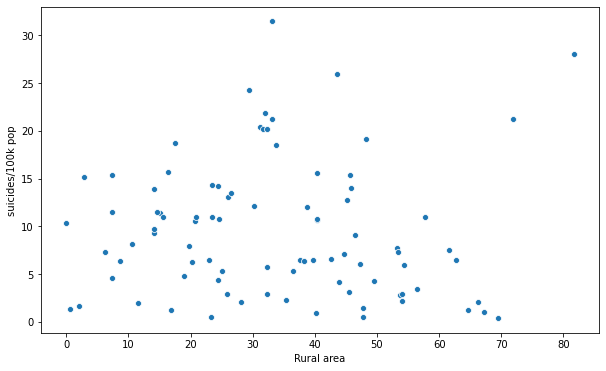

In [60]:

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=dfcountry,
                x="Rural area",
                y="suicides/100k pop",
                ax=ax);

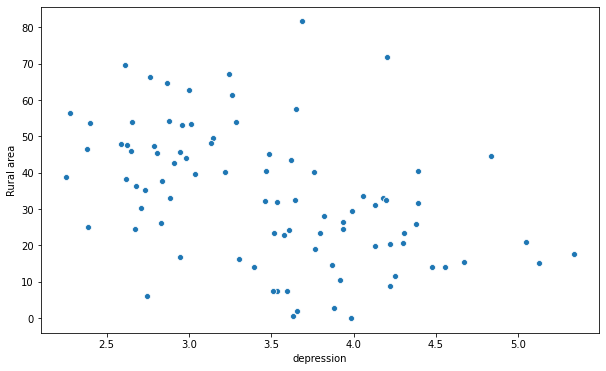

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=dfcountry,
                x="depression",
                y="Rural area",
                ax=ax);

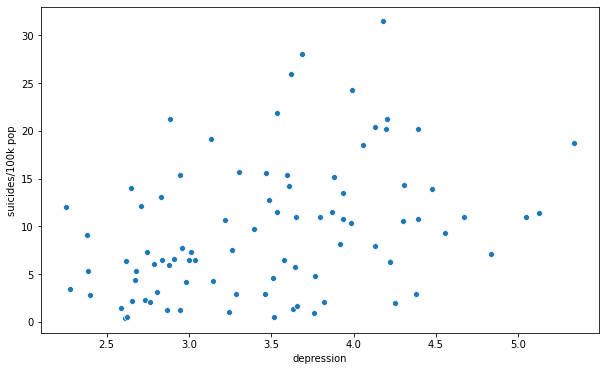

In [62]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=dfcountry,
                x="depression",
                y="suicides/100k pop",
                ax=ax);

In [63]:
##Analysis

In [64]:
dftrial.head()

,country,year,suicides/100k pop,depression,Rural area
0,Albania,1992,1.595833,2.230256,62.751
1,Albania,1993,2.860833,2.236942,62.201
2,Albania,1994,2.090000,2.245163,61.646
3,Albania,1995,3.317917,2.252920,61.089
4,Albania,1996,3.736667,2.261308,60.527


In [65]:
dfcountry.head()

,country,suicides/100k pop,depression,Rural area
0,Albania,3.415417,2.278600,56.412105
1,Antigua and Barbuda,0.396098,2.612769,69.514045
2,Argentina,8.141811,3.916675,10.507500
3,Armenia,2.257561,2.732754,35.338120
4,Australia,11.380733,5.126570,15.077600


In [66]:
#be sure there are no null values

nulltrial=dftrial.isnull().sum()
nulltrial.sort_values(ascending=False)

Rural area           0
depression           0
suicides/100k pop    0
year                 0
country              0
dtype: int64

In [67]:
#suicides corr

dftrial.corr()['suicides/100k pop']

year                -0.124540
suicides/100k pop    1.000000
depression           0.331911
Rural area          -0.052315
Name: suicides/100k pop, dtype: float64

In [68]:
#depression

dftrial.corr()['depression']

year                -0.064743
suicides/100k pop    0.331911
depression           1.000000
Rural area          -0.431282
Name: depression, dtype: float64

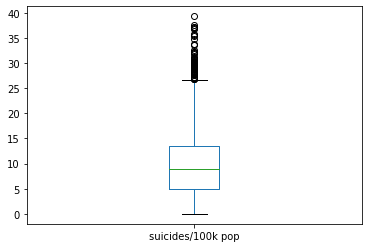

In [69]:
#check for outliers

dftrial.boxplot(column='suicides/100k pop', grid=False)

In [70]:
descriptive=dftrial.describe().transpose() 
descriptive

,count,mean,std,min,25%,50%,75%,max
year,1881.0,2003.039872,7.290624,1990.000000,1997.000000,2003.000000,2009.000000,2016.000000
suicides/100k pop,1881.0,9.997649,7.118492,0.000000,4.877083,8.942083,13.557083,39.310833
depression,1881.0,3.531012,0.727922,2.215816,2.885978,3.533458,4.078942,5.669116
Rural area,1881.0,32.093443,18.073507,0.000000,18.054000,31.649000,45.598000,81.712000


In [71]:
descriptive['IQR'] = descriptive['75%'] - descriptive['25%']
print(descriptive['IQR'])

outlier25=descriptive['25%']-(1.5*descriptive['IQR'])

outlier75=descriptive['75%']+(1.5*descriptive['IQR'])

print('outlier25', outlier25)
print('outlier75', outlier75)

year                 12.000000
suicides/100k pop     8.680000
depression            1.192964
Rural area           27.544000
Name: IQR, dtype: float64
outlier25 year                 1979.000000
suicides/100k pop      -8.142917
depression              1.096532
Rural area            -23.262000
dtype: float64
outlier75 year                 2027.000000
suicides/100k pop      26.577083
depression              5.868388
Rural area             86.914000
dtype: float64


'\n\nstatsyear = sm.add_constant(statsyear)\ny = statsyear["suicides/100k pop"]\nX = statsyear[["const",\'1990\',\'1991\',\'1992\',\'1993\',\'1994\',\'1995\',\'1996\',\'1997\',\'1998\',\'1999\',\'2000\',\'2001\',\'2002\',\'2003\',\'2004\',\'2005\',\'2006\',\'2007\',\'2008\',\'2009\',\'2010\',\'2011\',\'2012\',\'2013\',\'2014\',\'2015\',\'2016\']]\n\nreg = sm.OLS(y, X).fit()\n\nreg.summary()'

In [74]:
#with years, probably dummy needed

dftrialstats=dftrial.copy()

dftrialstats= sm.add_constant(dftrialstats)
y = dftrialstats["suicides/100k pop"]
X = dftrialstats[["const","depression"]]
reg = sm.OLS(y, X).fit()

reg.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     232.6
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.31e-49
Time:                        10:35:17   Log-Likelihood:                -6250.6
No. Observations:                1881   AIC:                         1.251e+04
Df Residuals:                    1879   BIC:                         1.252e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4634      0.767     -1.907      0.057      -2.968       0.041
depression     3.2458      0.213     15.252      0.000       2.828       3.663
==============================================================================
Omnibus:                      285.392   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.174
Skew:                           1.046   Prob(JB):                     5.83e-97
Kurtosis:                       4.132   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#average of the years

dfcountrystats=dfcountry.copy()

dfcountrystats= sm.add_constant(dfcountrystats)
y2 = dfcountrystats["suicides/100k pop"]
X2 = dfcountrystats[["const","depression"]]
reg2 = sm.OLS(y2, X2).fit()

reg2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     13.41
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           0.000432
Time:                        10:35:17   Log-Likelihood:                -288.99
No. Observations:                  88   AIC:                             582.0
Df Residuals:                      86   BIC:                             586.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9865      3.498     -0.854      0.396      -9.940       3.967
depression     3.6020      0.984      3.662      0.000       1.646       5.558
==============================================================================
Omnibus:                       10.796   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.110
Skew:                           0.848   Prob(JB):                      0.00387
Kurtosis:                       3.390   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#rural area check

dfrarea=dftrial.copy()

dfrarea= sm.add_constant(dfrarea)
y3 = dfrarea["depression"]
X3 = dfrarea[["const","Rural area"]]
reg3 = sm.OLS(y3, X3).fit()

reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     429.4
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           4.56e-86
Time:                        10:35:18   Log-Likelihood:                -1877.6
No. Observations:                1881   AIC:                             3759.
Df Residuals:                    1879   BIC:                             3770.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0885      0.031    132.424      0.000       4.028       4.149
Rural area    -0.0174      0.001    -20.721      0.000      -0.019      -0.016
==============================================================================
Omnibus:                       40.661   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.133
Skew:                           0.353   Prob(JB):                     7.09e-10
Kurtosis:                       2.803   Cond. No.                         75.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#rural area complete

In [91]:
dftrial.head()

,country,year,suicides/100k pop,depression,Rural area
0,Albania,1992,1.595833,2.230256,62.751
1,Albania,1993,2.860833,2.236942,62.201
2,Albania,1994,2.090000,2.245163,61.646
3,Albania,1995,3.317917,2.252920,61.089
4,Albania,1996,3.736667,2.261308,60.527


In [93]:
statsyearrural=dftrial.copy()

dummyyearrural=pd.get_dummies(statsyearrural['year'])
statsyearrural = statsyearrural.drop('year',axis = 1)
statsyearrural = statsyearrural.join(dummyyearrural)
statsyearrural.columns=['country','suicides/100k pop','depression','Rural area','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

In [96]:
statsyearrural = sm.add_constant(statsyearrural)
yyr = statsyearrural["depression"]
Xyr = statsyearrural[["const","Rural area",'1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']]

regyr = sm.OLS(yyr, Xyr).fit()

regyr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     17.55
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           4.44e-73
Time:                        11:07:12   Log-Likelihood:                -1857.0
No. Observations:                1881   AIC:                             3770.
Df Residuals:                    1853   BIC:                             3925.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9715      0.030    131.468      0.000       3.912       4.031
Rural area    -0.0178      0.001    -21.240      0.000      -0.019      -0.016
1990           0.2180      0.084      2.588      0.010       0.053       0.383
1991           0.2253      0.084      2.696      0.007       0.061       0.389
1992           0.2368      0.084      2.834      0.005       0.073       0.401
1993           0.2149      0.084      2.573      0.010       0.051       0.379
1994           0.2026      0.082      2.465      0.014       0.041       0.364
1995           0.2314      0.077      3.008      0.003       0.081       0.382
1996           0.2527      0.077      3.285      0.001       0.102       0.404
1997           0.2648      0.077      3.443      0.001       0.114       0.416
1998           0.2406      0.076      3.170      0.002       0.092       0.389
1999           0.2109      0.075      2.816      0.005       0.064       0.358
2000           0.1678      0.073      2.283      0.023       0.024       0.312
2001           0.1623      0.072      2.249      0.025       0.021       0.304
2002           0.1602      0.073      2.193      0.028       0.017       0.304
2003           0.1477      0.073      2.022      0.043       0.004       0.291
2004           0.1022      0.074      1.382      0.167      -0.043       0.247
2005           0.0687      0.074      0.923      0.356      -0.077       0.215
2006           0.0680      0.073      0.926      0.355      -0.076       0.212
2007           0.0698      0.073      0.962      0.336      -0.073       0.212
2008           0.0650      0.073      0.885      0.376      -0.079       0.209
2009           0.0349      0.072      0.486      0.627      -0.106       0.176
2010           0.0328      0.072      0.454      0.650      -0.109       0.174
2011           0.0418      0.073      0.573      0.567      -0.101       0.185
2012           0.0416      0.075      0.555      0.579      -0.105       0.188
2013           0.0327      0.075      0.434      0.664      -0.115       0.181
2014          -0.0170      0.076     -0.224      0.823      -0.166       0.132
2015          -0.0444      0.084     -0.527      0.598      -0.210       0.121
2016           0.5394      0.158      3.406      0.001       0.229       0.850
==============================================================================
Omnibus:                       36.487   Durbin-Watson:                   0.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.993
Skew:                           0.339   Prob(JB):                     5.62e-09
Kurtosis:                       2.845   Cond. No.                     5.62e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [77]:
##Analysis 2

In [78]:
final_df.head()

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473


In [79]:
agedf=final_df.copy()

#dummy year

dummyyear=pd.get_dummies(agedf['year'])
agedf = agedf.drop('year',axis = 1)
agedf = agedf.join(dummyyear)
agedf.columns=['country','age','suicides/100k pop','depression','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

In [80]:
#dummy age

dummyage=pd.get_dummies(agedf['age'])
agedf = agedf.drop('age',axis = 1)
agedf = agedf.join(dummyage)

In [81]:
agedf.columns

Index(['country', 'suicides/100k pop', 'depression', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '14- years',
       '15-24 years', '25-34 years', '35+ years'],
      dtype='object')

In [90]:
#regression with years and age 

agedf= sm.add_constant(agedf)
y4 = agedf["depression"]
X4 = agedf[["const",'suicides/100k pop','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016','14- years','15-24 years', '25-34 years', '35+ years']]
reg4 = sm.OLS(y4, X4).fit()

reg4.summary()

# '1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016',

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     699.3
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        10:40:27   Log-Likelihood:                -9483.7
No. Observations:                7880   AIC:                         1.903e+04
Df Residuals:                    7849   BIC:                         1.925e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4567      0.011    228.622      0.000       2.436       2.478
suicides/100k pop     0.0331      0.001     33.504      0.000       0.031       0.035
1990                  0.1517      0.051      2.967      0.003       0.052       0.252
1991                  0.1333      0.051      2.627      0.009       0.034       0.233
1992                  0.1380      0.050      2.741      0.006       0.039       0.237
1993                  0.1291      0.050      2.585      0.010       0.031       0.227
1994                  0.1192      0.049      2.423      0.015       0.023       0.216
1995                  0.1079      0.046      2.330      0.020       0.017       0.199
1996                  0.1286      0.046      2.778      0.005       0.038       0.219
1997                  0.1562      0.046      3.375      0.001       0.065       0.247
1998                  0.1333      0.046      2.918      0.004       0.044       0.223
1999                  0.1055      0.045      2.338      0.019       0.017       0.194
2000                  0.0798      0.044      1.802      0.072      -0.007       0.167
2001                  0.0813      0.044      1.867      0.062      -0.004       0.167
2002                  0.0741      0.044      1.683      0.092      -0.012       0.160
2003                  0.0791      0.044      1.797      0.072      -0.007       0.165
2004                  0.0808      0.045      1.813      0.070      -0.007       0.168
2005                  0.0624      0.045      1.393      0.164      -0.025       0.150
2006                  0.0726      0.044      1.640      0.101      -0.014       0.159
2007                  0.0834      0.044      1.894      0.058      -0.003       0.170
2008                  0.0802      0.044      1.811      0.070      -0.007       0.167
2009                  0.0679      0.043      1.570      0.117      -0.017       0.153
2010                  0.0783      0.044      1.798      0.072      -0.007       0.164
2011                  0.0890      0.044      2.009      0.045       0.002       0.176
2012                  0.0912      0.045      2.023      0.043       0.003       0.180
2013                  0.0931      0.045      2.051      0.040       0.004       0.182
2014                  0.0743      0.046      1.616      0.106      -0.016       0.164
2015                  0.0756      0.052      1.466      0.143      -0.025       0.177
2016                 -0.1091      0.113     -0.966      0.334      -0.330       0.112
14- years            -1.1380      0.018    -64.931      0.000      -1.172      -1.104
15-24 years           0.7186      0.016     45.238      0.000       0.687       0.750
25-34 years           1.0999      0.016     67.305      0.000       1.068       1.132
35+ years             1.7762      0.019     95.109      0.000       1.740

In [99]:
#regression with age only y as depression

agetest=agedf.copy()
agetest= sm.add_constant(agetest)
y5 = agetest["depression"]
X5 = agetest[["const",'suicides/100k pop','14- years','15-24 years', '25-34 years', '35+ years']]
reg5 = sm.OLS(y5, X5).fit()

reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             depression   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     5251.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:29:32   Log-Likelihood:                -9489.5
No. Observations:                7880   AIC:                         1.899e+04
Df Residuals:                    7875   BIC:                         1.902e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5311      0.011    238.596      0.000       2.510       2.552
suicides/100k pop     0.0334      0.001     34.026      0.000       0.031       0.035
14- years            -1.1159      0.017    -64.102      0.000      -1.150      -1.082
15-24 years           0.7370      0.016     46.438      0.000       0.706       0.768
25-34 years           1.1176      0.016     68.430      0.000       1.086       1.150
35+ years             1.7924      0.019     96.114      0.000       1.756       1.829
==============================================================================
Omnibus:                      486.891   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.752
Skew:                           0.643   Prob(JB):                    7.79e-127
Kurtosis:                       3.341   Cond. No.                     1.35e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
#check time series suicide rates only. years with giher coef influence more the model/suicide

timesdf=agedf.copy()
timesdf= sm.add_constant(timesdf)
yts = timesdf["suicides/100k pop"]
Xts = timesdf[["const",'1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']]
regts = sm.OLS(yts, Xts).fit()

regts.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.017
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           4.00e-07
Time:                        11:52:33   Log-Likelihood:                -30153.
No. Observations:                7880   AIC:                         6.036e+04
Df Residuals:                    7853   BIC:                         6.055e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5780      0.131     73.254      0.000       9.322       9.834
1990           0.5428      0.704      0.771      0.441      -0.838       1.923
1991           0.9481      0.699      1.357      0.175      -0.422       2.318
1992           0.8214      0.693      1.185      0.236      -0.538       2.180
1993           0.8651      0.688      1.258      0.209      -0.483       2.214
1994           0.8490      0.678      1.253      0.210      -0.479       2.177
1995           2.2333      0.637      3.507      0.000       0.985       3.481
1996           2.0702      0.637      3.251      0.001       0.822       3.318
1997           1.9568      0.637      3.073      0.002       0.709       3.205
1998           1.7295      0.629      2.751      0.006       0.497       2.962
1999           1.8114      0.621      2.917      0.004       0.594       3.028
2000           1.1009      0.610      1.805      0.071      -0.094       2.296
2001           0.7912      0.599      1.320      0.187      -0.384       1.966
2002           0.8623      0.606      1.422      0.155      -0.326       2.051
2003           0.4708      0.606      0.777      0.437      -0.718       1.659
2004          -0.1589      0.613     -0.259      0.796      -1.361       1.044
2005          -0.3774      0.617     -0.612      0.541      -1.587       0.832
2006          -0.6232      0.610     -1.022      0.307      -1.819       0.572
2007          -0.4947      0.606     -0.816      0.415      -1.683       0.694
2008          -0.4729      0.610     -0.775      0.438      -1.668       0.723
2009          -0.8830      0.596     -1.482      0.139      -2.051       0.285
2010          -1.0303      0.599     -1.719      0.086      -2.205       0.145
2011          -1.0838      0.610     -1.777      0.076      -2.279       0.112
2012          -0.9088      0.621     -1.464      0.143      -2.126       0.308
2013          -0.9669      0.625     -1.548      0.122      -2.192       0.258
2014          -1.1386      0.633     -1.800      0.072      -2.379       0.102
2015          -1.1867      0.710     -1.671      0.095      -2.579       0.205
2016           1.8504      1.553      1.191      0.233      -1.194       4.895
==============================================================================
Omnibus:                     2784.982   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9644.433
Skew:                           1.792   Prob(JB):                         0.00
Kurtosis:                       7.066   Cond. No.                     1.63e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-27. This might indic

In [117]:
#IMPORTANT:regression with age only y as suicide (goal) - to compare later wiht the case study

dfcompare=agedf.copy()
dfcompare= sm.add_constant(dfcompare)
yc = dfcompare["suicides/100k pop"]
Xc = dfcompare[["const",'depression','14- years','15-24 years', '25-34 years', '35+ years']]
regc = sm.OLS(yc, Xc).fit()

regc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     1308.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:33:15   Log-Likelihood:                -28185.
No. Observations:                7880   AIC:                         5.638e+04
Df Residuals:                    7875   BIC:                         5.642e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8560      0.325     -8.794      0.000      -3.493      -2.219
depression      3.8397      0.113     34.026      0.000       3.618       4.061
14- years      -2.0341      0.229     -8.876      0.000      -2.483      -1.585
15-24 years    -1.9353      0.191    -10.139      0.000      -2.309      -1.561
25-34 years    -0.7524      0.221     -3.404      0.001      -1.186      -0.319
35+ years       1.8658      0.294      6.344      0.000       1.289       2.442
==============================================================================
Omnibus:                     2279.027   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8928.358
Skew:                           1.392   Prob(JB):                         0.00
Kurtosis:                       7.409   Cond. No.                     3.48e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.02e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
#soviet union analysis - checked on tableau that the countries with higher suicide rates are former URSS 

urssdf=final_df.copy()
urssdf.head()

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473


In [108]:
#selecting the 8 countries of the top 10 suicide with URSS connection

urssdf=urssdf.loc[(urssdf['country']=='Lithuania') | (urssdf['country']=='Kazakhstan')| (urssdf['country']=='Belarus')| (urssdf['country']=='Latvia')| (urssdf['country']=='Estonia')| (urssdf['country']=='Ukraine')| (urssdf['country']=='Mongolia')| (urssdf['country']=='Hungary')]

In [109]:
urssdf['country'].value_counts

<bound method IndexOpsMixin.value_counts of 874     Belarus
875     Belarus
876     Belarus
877     Belarus
878     Belarus
         ...   
7463    Ukraine
7464    Ukraine
7465    Ukraine
7466    Ukraine
7467    Ukraine
Name: country, Length: 649, dtype: object>

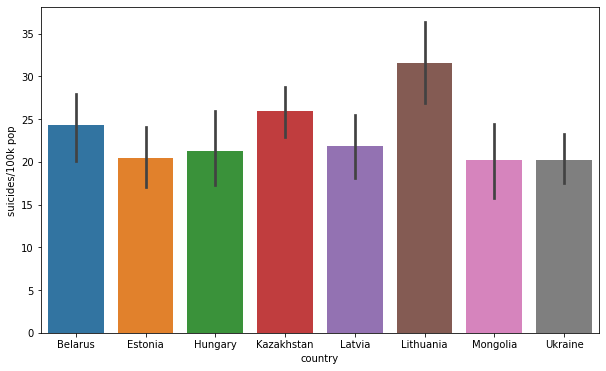

In [112]:
#confirm the countries

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=urssdf,
                x="country",
                y="suicides/100k pop",
                ax=ax);

In [113]:
urssdf.head()

,country,year,age,suicides/100k pop,depression
874,Belarus,1990,14- years,0.700000,1.223662
875,Belarus,1990,15-24 years,11.090000,3.342973
876,Belarus,1990,25-34 years,23.925000,4.216288
877,Belarus,1990,35+ years,33.823333,6.685600
878,Belarus,1991,14- years,0.995000,1.228455


In [114]:
#dummy age group

dummyagegroup=pd.get_dummies(urssdf['age'])
urssdf = urssdf.drop('age',axis = 1)
urssdf = urssdf.join(dummyagegroup)

In [118]:
#dummy year

dummyyearurss=pd.get_dummies(urssdf['year'])
urssdf = urssdf.drop('year',axis = 1)
urssdf = urssdf.join(dummyyearurss)

In [120]:
urssdf.columns=['const','country','suicides/100k pop','depression','14- years','15-24 years','25-34 years','35+ years','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [121]:
urssdf.columns

Index(['const', 'country', 'suicides/100k pop', 'depression', '14- years',
       '15-24 years', '25-34 years', '35+ years', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [123]:
urssdf= sm.add_constant(urssdf)
yurss = urssdf["suicides/100k pop"]
Xurss = urssdf[["const","depression",'14- years','15-24 years', '25-34 years', '35+ years','1990', '1991','1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999','2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', '2011', '2012', '2013', '2014', '2015', '2016']]
regurss = sm.OLS(yurss, Xurss).fit()

regurss.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      suicides/100k pop   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     100.7
Date:                Wed, 16 Sep 2020   Prob (F-statistic):          9.77e-216
Time:                        12:39:08   Log-Likelihood:                -2238.9
No. Observations:                 649   AIC:                             4540.
Df Residuals:                     618   BIC:                             4679.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6403      1.595      6.671      0.000       7.508      13.773
depression      2.5111      0.541      4.640      0.000       1.448       3.574
14- years     -13.1705      1.140    -11.554      0.000     -15.409     -10.932
15-24 years    -1.9172      0.556     -3.446      0.001      -3.010      -0.825
25-34 years     7.3487      0.779      9.434      0.000       5.819       8.878
35+ years      18.3795      1.929      9.527      0.000      14.591      22.168
1990           -4.0179      2.197     -1.829      0.068      -8.333       0.297
1991           -0.2629      1.907     -0.138      0.890      -4.007       3.481
1992            0.8618      1.907      0.452      0.651      -2.883       4.607
1993            2.3309      1.907      1.222      0.222      -1.414       6.076
1994            3.4471      1.907      1.807      0.071      -0.298       7.192
1995            7.1300      1.464      4.871      0.000       4.256      10.004
1996            6.6118      1.464      4.517      0.000       3.737       9.487
1997            6.2785      1.464      4.289      0.000       3.404       9.153
1998            5.1296      1.464      3.505      0.000       2.255       8.004
1999            5.4288      1.463      3.710      0.000       2.555       8.302
2000            4.8478      1.463      3.315      0.001       1.976       7.720
2001            3.3740      1.462      2.308      0.021       0.504       6.244
2002            3.1186      1.461      2.135      0.033       0.250       5.987
2003            2.6117      1.459      1.790      0.074      -0.254       5.478
2004            1.1762      1.568      0.750      0.454      -1.904       4.256
2005           -0.6098      1.568     -0.389      0.697      -3.689       2.469
2006           -2.4041      1.567     -1.534      0.126      -5.482       0.674
2007           -1.2797      1.456     -0.879      0.380      -4.140       1.580
2008           -1.0173      1.456     -0.699      0.485      -3.876       1.842
2009           -1.2679      1.456     -0.871      0.384      -4.126       1.591
2010           -2.8715      1.456     -1.973      0.049      -5.730      -0.013
2011           -3.2824      1.455     -2.255      0.024      -6.141      -0.424
2012           -3.9928      1.567     -2.548      0.011      -7.070      -0.915
2013           -3.6558      1.567     -2.332      0.020      -6.734      -0.578
2014           -4.6427      1.456     -3.190      0.001      -7.501      -1.784
2015           -5.4586      1.567     -3.483      0.001      -8.537      -2.380
2016           -6.9429      2.539     -2.735      0.006     -11.928      -1.958
==============================================================================
Omnibus:                       95.137   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarqu